# Sequential Model
Using 4 emotions in total (angry, sad, disgust, suprise)

In [3]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

### Prepare the Model (from scratch)

In [4]:
# Load CSV
data = pd.read_csv(r"C:\Users\kaitl\Documents\Vandy_BootCamp\fer2013.csv")

# Filter for disgust (label 1), happy (label 3), sad (label 4) and suprise (label 5)
filtered = data[data['emotion'].isin([1,3,4,5])]

# Map labels: 3 → 0 (happy), 4 → 1 (sad)
filtered['emotion'] = filtered['emotion'].map({3: 0, 4: 1, 1:2, 5:3})

# Convert pixels string to numpy array
X = []
for i in range(len(filtered)):
    img = np.fromstring(filtered.iloc[i]['pixels'], sep=' ').reshape(48,48)
    X.append(img)

X = np.array(X)
y = filtered['emotion'].values

# Normalize pixel values
X = X / 255.0

# Reshape for CNN input
X = X.reshape(-1, 48, 48, 1)

# One-hot encode labels
y = to_categorical(y, 4)

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")


C:\Users\kaitl\AppData\Local\Temp\ipykernel_13796\405838670.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['emotion'] = filtered['emotion'].map({3: 0, 4: 1, 1:2, 5:3})


Shape of X: (19615, 48, 48, 1)
Shape of y: (19615, 4)


### Build the Model 

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Train the model 
history = model.fit(X, y, validation_split=0.2, epochs=20, batch_size=64)


c:\Users\kaitl\anaconda3\envs\env1\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 12s 42ms/step - accuracy: 0.5039 - loss: 1.0890 - val_accuracy: 0.6406 - val_loss: 0.8425
Epoch 2/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.6527 - loss: 0.8430 - val_accuracy: 0.7015 - val_loss: 0.7343
Epoch 3/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.7040 - loss: 0.7464 - val_accuracy: 0.7173 - val_loss: 0.6966
Epoch 4/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.7336 - loss: 0.6837 - val_accuracy: 0.7492 - val_loss: 0.6286
Epoch 5/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.7545 - loss: 0.6375 - val_accuracy: 0.7555 - val_loss: 0.6190
Epoch 6/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.7719 - loss: 0.5948 - val_accuracy: 0.7688 - val_loss: 0.5902
Epoch 7/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.7723 - loss: 0.5730 - val_accuracy: 0.7591 - val_loss: 0.6278
Epoch 8/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.7896 - loss: 0.5405 - 

### Evaluate

In [6]:
# Evaluate the model accuracy
loss, accuracy = model.evaluate(X, y)
print(f"Model Loss: {loss}")
print(f"Model Accuracy: {accuracy}")

613/613 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9668 - loss: 0.1246
Model Loss: 0.21553869545459747
Model Accuracy: 0.9407086372375488


**Sequential (from-scratch) w/ weights** (4 classes)

Training Results:
- Accuracy: 0.9668
- Loss: 0.1246

Test Results:
- Accuracy: 0.9407
- Loss: 0.2155

**Question: Was this model successful?** Yes. 

**Analysis**: The model achieves very high training accuracy (96.68%) and test accuracy (94.07%), indicating that it performs exceptionally well on both the training and test datasets.  The high accuracy and low loss on both the training and test datasets indicate that the model is effective for the 4-class emotional classification task. It generalizes well and does not show signs of significant overfitting or underfitting.

**Conclusion**: The Sequential model trained from scratch for 4-class emotional classification is highly successful, achieving over 94% test accuracy with low loss. This indicates that the model is well-suited for the task and effectively learns from the dataset. It demonstrates strong generalization and robustness for this classification problem.

### Plot the Model Results

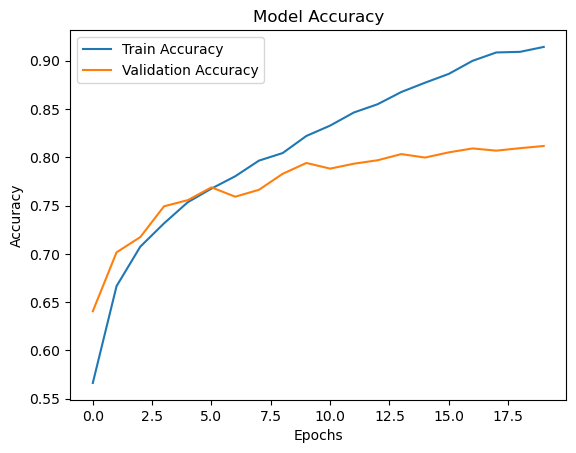

In [7]:
# Plot the accuracy 
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

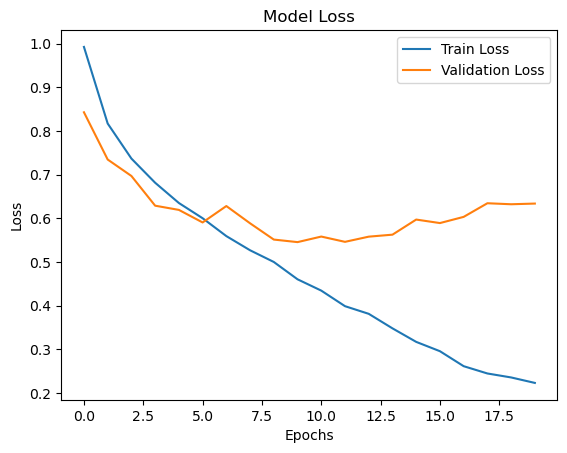

In [8]:
# Plot the loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [9]:
# Save model and weights
# model.save('my_model.keras')
